# **Ex1 - Unsupervised learning**

## Names and IDs

1.   315540336
2.   206010373


In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
# Here we import all packages that we used in EX1
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes
 49% 20.0M/41.0M [00:00<00:00, 206MB/s]
100% 41.0M/41.0M [00:00<00:00, 269MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [ ]:
# Implement here
# Example for reading one file. It will work if the previous step was successful.
fake_df = pd.read_csv('/content/Fake.csv')
True_df = pd.read_csv('/content/True.csv')

# Fake label is 0. True label is 1.
fake_df['label'] = 0
True_df['label'] = 1

# Merge DataFrames 
dfs = [fake_df,True_df]
df = pd.concat(dfs)
df = df[['text', 'label']]

# Print the DF
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [ ]:
def train_kmean(k,data):
  cluster = KMeans(n_clusters=k)
  cluster_labels = cluster.fit_predict(data)
  return cluster, cluster_labels


In [ ]:
# Geneerare 1000 TD-IDF features without english stop words.
# Then, scale the data with StandardScaler and apply k-means with k=2.
vectorizer = TfidfVectorizer(max_features=1000,stop_words='english')
vectors = vectorizer.fit_transform(df['text'].to_list())
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)

#scaling the Data
scale = StandardScaler()
scaledX = scale.fit_transform(tf_idf)

# Apply k-means with k=2.
n_clusters = 2
cluster,cluster_labels =  train_kmean(2,scaledX)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 3. Visualize using scatter plot (15 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction using PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

In [ ]:
#plot for 2d
def plot_cluster_2d(data,centroids,cluster_labels):
  plt.figure(figsize=(10,7))
  plot = plt.scatter(data[:,0], data[:,1], alpha=0.2, c= cluster_labels ,edgecolor="face")
  plt.scatter(centroids[:,0], centroids[:,1], c= 'black',s=100,marker='x')
  plt.legend(handles=plot.legend_elements()[0], labels=set(df['label']))
  plt.title('Clustering in 2d')
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.show()
  
#plot for 3d
def plot_cluster_3d(Xt,centroid_3d,cluster_labels):
  fig = plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")

  ax.scatter3D(Xt[cluster_labels==0, 0], Xt[cluster_labels==0, 1], Xt[cluster_labels==0, 2],  c='yellow', label='True',marker=".")
  ax.scatter3D(Xt[cluster_labels==1, 0], Xt[cluster_labels==1, 1], Xt[cluster_labels==1, 2],  c='red', label='Fake',marker=".")
  ax.scatter3D(centroid_3d[:,0], centroid_3d[:,1], centroid_3d[:,2], c= 'black',s=100,marker="x")

  plt.title('Clustering in 3d')
  ax.set_xlabel('PCA 1')
  ax.set_ylabel('PCA 2')
  ax.set_zlabel('PCA 3')

  plt.show()


##Visualize the clustering in 2d

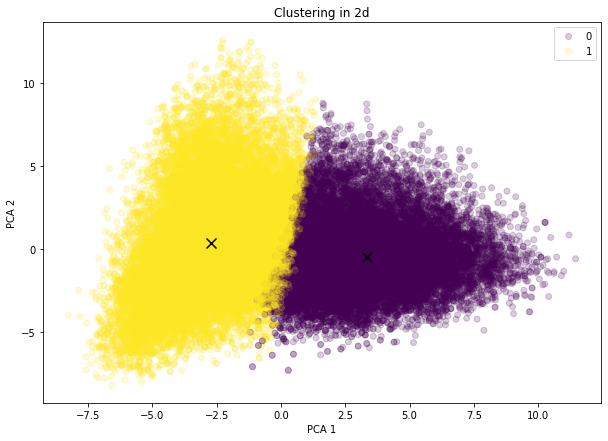

In [ ]:
# Apply PCA and plot 2D using first two PCs.

centroids = cluster.cluster_centers_

pca = PCA(n_components=2)
Xt = pca.fit_transform(scaledX)
centroid_2d = pca.transform(centroids)

plot_cluster_2d(Xt,centroid_2d,cluster_labels)


##Visualize the clustering in 3d 

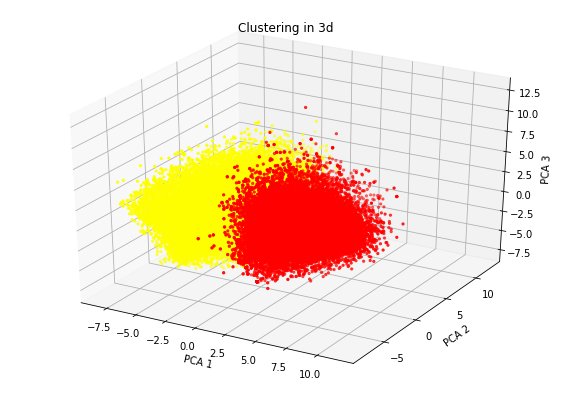

In [ ]:
# Apply PCA and plot 3D using first three PCs.
pca = PCA(n_components=3)
Xt = pca.fit_transform(scaledX)
centroids = cluster.cluster_centers_
centroid_3d = pca.transform(centroids)

plot_cluster_3d(Xt,centroid_3d,cluster_labels)


## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [ ]:
# Calculate the performance evaluation with accuracy score.
acc1 = accuracy_score(df['label'], cluster_labels)
print(f"Define cluster 1 as fake and cluster 2 as real. What is the accuracy: {acc1}")

cluster_labels_reverse = []

for i in range(len(cluster_labels)):
  if cluster_labels[i] == 1:
    cluster_labels_reverse.append(0)
  else:
    cluster_labels_reverse.append(1)

acc2 = accuracy_score(df['label'], cluster_labels_reverse)
print(f"Define cluster 1 as true and cluster 2 as fake. What is the accuracy: {acc2}")

Define cluster 1 as fake and cluster 2 as real. What is the accuracy: 0.8730678426655976
Define cluster 1 as true and cluster 2 as fake. What is the accuracy: 0.1269321573344024


## 5. Find optimal `k` (10 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

In [ ]:
# Compute 19 diffrent k between 2 to 20 to find the optimal k.

def calculate_silhouette_SSD(index1,index2,scaledX):
  mapping1 = {}
  mapping2 = {}
  for k in range(index1,index2):
    cluster,cluster_labels =  train_kmean(k,scaledX)

    mapping1[k] = cluster.inertia_ #get SSD
    mapping2[k] = silhouette_score(scaledX, cluster_labels,sample_size=300)

  return mapping1,mapping2

mapping1,mapping2 = calculate_silhouette_SSD(2,21,scaledX)

df_SSD_silhouette = pd.DataFrame(list(zip(mapping1.keys(), mapping1.values(),mapping2.values())),
               columns =['k', 'ssd','silhouette'])

df_SSD_silhouette

,k,ssd,silhouette
0,2,4.447767e+07,0.010783
1,3,4.424143e+07,-0.001338
2,4,4.408779e+07,-0.003048
3,5,4.394331e+07,0.002372
4,6,4.379591e+07,0.004922
5,7,4.365125e+07,-0.009163
6,8,4.354299e+07,-0.005899
7,9,4.340183e+07,-0.029498
8,10,4.332442e+07,-0.070367
9,11,4.320663e+07,-0.047456


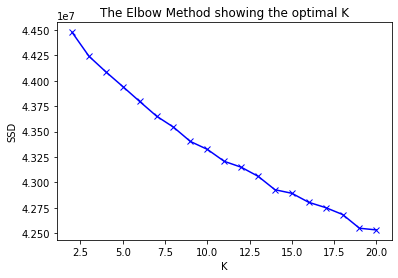

In [ ]:
# Plot of the elbow method to show the optimal k.

# plt.figure(figsize=(7,7))
plt.plot(list(mapping1.keys()), list(mapping1.values()), 'bx-')
plt.xlabel('K')
plt.ylabel('SSD')
plt.title('The Elbow Method showing the optimal K')
plt.show()

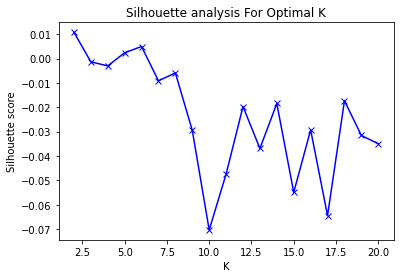

In [ ]:
# Plot of the silhouette score to show the optimal k.

plt.plot(list(mapping2.keys()),list(mapping2.values()),"bx-")
plt.xlabel("K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal K")
plt.show()

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

In silhouette plot graph we choose that k = 2 its optimal k because its maximum value and for Elbow we can't be chosen k because:

1. There are many features for the model and the k-means does not converge (we don't see elbow in the graph).
2. It could be that the optimal k is greater than 20 and we checked up to k=20.




# 7. PCA then k-means (10 points)

1.   List item
2.   List item


This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA (using all dimenssions)
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

## TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000,stop_words='english')
vectors = vectorizer.fit_transform(df['text'].to_list())
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)
scale = StandardScaler()
scaledX = scale.fit_transform(tf_idf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##PCA 2 

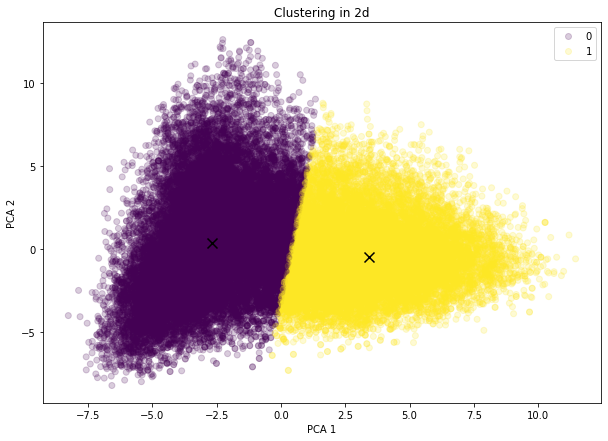

In [ ]:
pca = PCA(n_components=2)
Xt_2 = pca.fit_transform(scaledX)

# Apply k-means with k=2.

cluster,cluster_labels_2 =  train_kmean(2,Xt_2)
centroid_2d = cluster.cluster_centers_
# plot 2D using first two PCs.

plot_cluster_2d(Xt_2,centroid_2d,cluster_labels_2)


## Accuracy - PCA 2

In [ ]:
# Calculate the performance evaluation with accuracy score - pca2.
acc1 = accuracy_score(df['label'], cluster_labels_2)
print(f"Define cluster 1 as fake and cluster 2 as real. What is the accuracy: {acc1}")

cluster_labels_reverse = []

for i in range(len(cluster_labels_2)):
  if cluster_labels_2[i] == 1:
    cluster_labels_reverse.append(0)
  else:
    cluster_labels_reverse.append(1)

acc2 = accuracy_score(df['label'], cluster_labels_reverse)
print(f"Define cluster 1 as true and cluster 2 as fake. What is the accuracy: {acc2}")

Define cluster 1 as fake and cluster 2 as real. What is the accuracy: 0.1351953316406076
Define cluster 1 as true and cluster 2 as fake. What is the accuracy: 0.8648046683593924


## TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000,stop_words='english')
vectors = vectorizer.fit_transform(df['text'].to_list())
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)
scale = StandardScaler()
scaledX = scale.fit_transform(tf_idf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##PCA 3

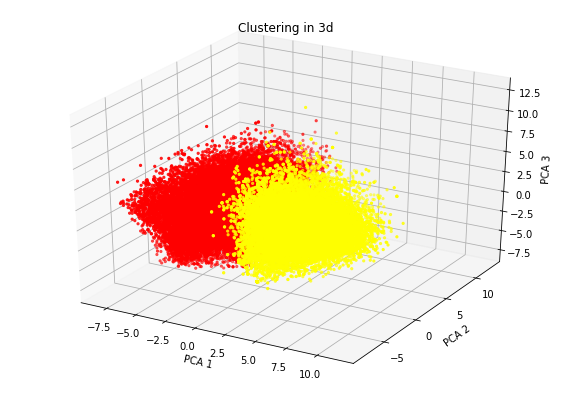

In [ ]:
pca = PCA(n_components=3)
Xt_3 = pca.fit_transform(scaledX)

# Apply k-means with k=2.

cluster,cluster_labels_3 =  train_kmean(2,Xt_3)
centroid_3d = cluster.cluster_centers_
plot_cluster_3d(Xt_3,centroid_3d,cluster_labels_3)


## Accuracy - PCA 3

In [ ]:
# Calculate the performance evaluation with accuracy score - pca2.
acc1 = accuracy_score(df['label'], cluster_labels_3)
print(f"Define cluster 1 as fake and cluster 2 as real. What is the accuracy: {acc1}")

cluster_labels_reverse = []

for i in range(len(cluster_labels_3)):
  if cluster_labels_3[i] == 1:
    cluster_labels_reverse.append(0)
  else:
    cluster_labels_reverse.append(1)

acc2 = accuracy_score(df['label'], cluster_labels_reverse)
print(f"Define cluster 1 as true and cluster 2 as fake. What is the accuracy: {acc2}")

Define cluster 1 as fake and cluster 2 as real. What is the accuracy: 0.8651610316717894
Define cluster 1 as true and cluster 2 as fake. What is the accuracy: 0.1348389683282106


#Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

 There is no difference between two approachs. can we use at the first approach or the second. we get the **same** results in both.

The graphs of the 2D and 3D look the same,  and the accuracy is close. A possible explanation for this is that the PCA tries to save the information in a reduced dimension, so the prediction has hardly changed.

# MNIST clustering (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10? \\
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now. Meaning that you don't need to bother in case there are two clusters with the same label according to the majority vote. Simply count what is the fraction of 'other' digits in each cluster.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Data Normalization
# Conversion to float
x_train = x_train.astype("float32") 
x_test = x_test.astype("float32")

# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [ ]:
# Associates most probable label with each cluster in KMeans model
#returns: dictionary of clusters assigned to each label
def retrieve_info(cluster_labels,y_train):  
  # Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

print(f"accuracy_score: {accuracy_score(number_labels,y_train)}")

accuracy_score: 0.5885833333333333


In [ ]:
# Compute 19 diffrent k between 2 to 20 to find the optimal k.
mapping1_MiniBatchKMeans = {}
mapping2_MiniBatchKMeans = {}
for k in range(2,21):
  clusterer = MiniBatchKMeans(n_clusters=k)
  clusterer.fit(X_train)
  cluster_labels = clusterer.labels_

  mapping1_MiniBatchKMeans[k] = clusterer.inertia_
  mapping2_MiniBatchKMeans[k] = silhouette_score(X_train, cluster_labels,sample_size=300)


df = pd.DataFrame(list(zip(mapping1_MiniBatchKMeans.keys(), mapping1_MiniBatchKMeans.values(),mapping2_MiniBatchKMeans.values())),
               columns =['k', 'ssd','silhouette'])

df

,k,ssd,silhouette
0,2,2968361.00,0.116875
1,3,2825383.00,0.057430
2,4,2790785.00,0.036054
3,5,2646680.00,0.061682
4,6,2576292.00,0.052255
5,7,2543903.00,0.043808
6,8,2458618.50,0.058585
7,9,2436125.00,0.039387
8,10,2372848.50,0.051962
9,11,2332585.50,0.057727


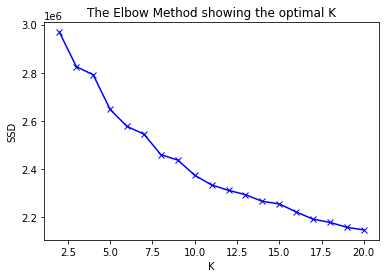

In [ ]:
# Plot of the elbow method to show the optimal k.

# plt.figure(figsize=(7,7))
plt.plot(list(mapping1_MiniBatchKMeans.keys()), list(mapping1_MiniBatchKMeans.values()), 'bx-')
plt.xlabel('K')
plt.ylabel('SSD')
plt.title('The Elbow Method showing the optimal K')
plt.show()

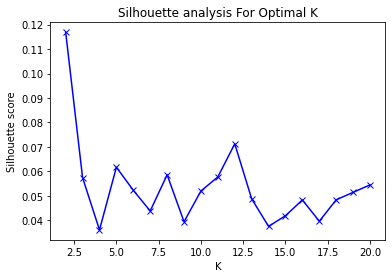

In [ ]:
# Plot of the silhouette score to show the optimal k.

plt.plot(list(mapping2_MiniBatchKMeans.keys()),list(mapping2_MiniBatchKMeans.values()),"bx-")
plt.xlabel("K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal K")
plt.show()

**Q2**:
According  to the SSD graph, it is difficult to say what the optimal K is that sustains the elbow, on the other hand in the Silhouette graph it can be said that the optimal K is 2.

##first run PCA

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Data Normalization
# Conversion to float
x_train = x_train.astype("float32") 
x_test = x_test.astype("float32")

# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

pca = PCA()
Xt_2 = pca.fit_transform(X_train)

total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(Xt_2)

MiniBatchKMeans(n_clusters=10)

In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

print(f"accuracy_score: {accuracy_score(number_labels,y_train)}")

accuracy_score: 0.5416333333333333


In [ ]:
# Compute 19 diffrent k between 2 to 20 to find the optimal k.
mapping1_MiniBatchKMeans = {}
mapping2_MiniBatchKMeans = {}
for k in range(2,21):
  clusterer = MiniBatchKMeans(n_clusters=k)
  clusterer.fit(X_train)
  cluster_labels = clusterer.labels_

  mapping1_MiniBatchKMeans[k] = clusterer.inertia_
  mapping2_MiniBatchKMeans[k] = silhouette_score(X_train, cluster_labels,sample_size=300)


df = pd.DataFrame(list(zip(mapping1_MiniBatchKMeans.keys(), mapping1_MiniBatchKMeans.values(),mapping2_MiniBatchKMeans.values())),
               columns =['k', 'ssd','silhouette'])

df

,k,ssd,silhouette
0,2,2974979.00,0.083532
1,3,2817956.00,0.062170
2,4,2713595.75,0.067667
3,5,2648759.25,0.053706
4,6,2536342.00,0.072627
5,7,2499406.50,0.046663
6,8,2438959.00,0.054615
7,9,2438474.25,0.064682
8,10,2387676.25,0.067052
9,11,2332766.50,0.063268


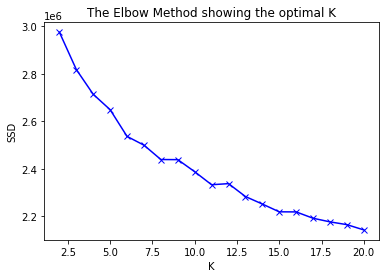

In [ ]:
# Plot of the elbow method to show the optimal k.

# plt.figure(figsize=(7,7))
plt.plot(list(mapping1_MiniBatchKMeans.keys()), list(mapping1_MiniBatchKMeans.values()), 'bx-')
plt.xlabel('K')
plt.ylabel('SSD')
plt.title('The Elbow Method showing the optimal K')
plt.show()

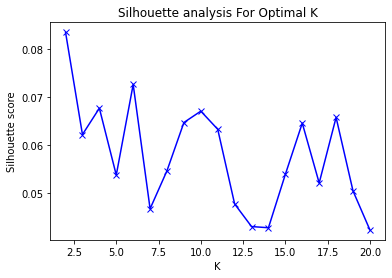

In [ ]:
# Plot of the silhouette score to show the optimal k.

plt.plot(list(mapping2_MiniBatchKMeans.keys()),list(mapping2_MiniBatchKMeans.values()),"bx-")
plt.xlabel("K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal K")
plt.show()

**q3**: It can be seen that there is almost no change in the accuracy and SSD and Silhouette values because the PCA transformation preserves the information

# Compute projection (10 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

$\begin{pmatrix}
1 & 3
\end{pmatrix}$
*

$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$

=
$\begin{pmatrix}
7 & -2
\end{pmatrix}$
######################################################################

$\begin{pmatrix}
3 & 7
\end{pmatrix}$

*
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$

=
$\begin{pmatrix}
17 & -4
\end{pmatrix}$

We Select the numbers 7 and 17 using the corrspoding egienvalues (5,-1)